In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

from sklearn.metrics import r2_score  #评价回归预测模型的性能

import matplotlib.pyplot as plt
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

from sklearn.preprocessing import StandardScaler


dpath = './data/'
data = pd.read_csv(dpath + "train_good.csv")

data.head()




,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,1.0,65.0,8450,1.0,1.0,1.0,1.0,...,0,1.0,1.0,1.0,0,2,2008,1.0,1.0,208500
1,1,2,20,1.0,80.0,9600,1.0,1.0,1.0,1.0,...,0,1.0,1.0,1.0,0,5,2007,1.0,1.0,181500
2,2,3,60,1.0,68.0,11250,1.0,1.0,2.0,1.0,...,0,1.0,1.0,1.0,0,9,2008,1.0,1.0,223500
3,3,4,70,1.0,60.0,9550,1.0,1.0,2.0,1.0,...,0,1.0,1.0,1.0,0,2,2006,1.0,2.0,140000
4,4,5,60,1.0,84.0,14260,1.0,1.0,2.0,1.0,...,0,1.0,1.0,1.0,0,12,2008,1.0,1.0,250000


In [14]:
data.describe()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000
mean,729.500000,730.500000,56.897260,1.340411,57.623288,10516.828082,1.004110,1.090411,1.408219,1.195205,...,2.758904,1.010274,1.332877,1.043151,43.489041,6.321918,2007.815753,1.234932,1.35000,180921.195890
std,421.610009,421.610009,42.300571,0.798309,34.664304,9981.264932,0.063996,0.372151,0.582296,0.642010,...,40.177307,0.158916,0.793316,0.245984,496.123024,2.703626,1.328095,0.804553,0.88787,79442.502883
min,0.000000,1.000000,20.000000,1.000000,0.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2006.000000,1.000000,1.00000,34900.000000
25%,364.750000,365.750000,20.000000,1.000000,42.000000,7553.500000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,2007.000000,1.000000,1.00000,129975.000000
50%,729.500000,730.500000,50.000000,1.000000,63.000000,9478.500000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,6.000000,2008.000000,1.000000,1.00000,163000.000000
75%,1094.250000,1095.250000,70.000000,1.000000,79.000000,11601.500000,1.000000,1.000000,2.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000,2009.000000,1.000000,1.00000,214000.000000
max,1459.000000,1460.000000,190.000000,5.000000,313.000000,215245.000000,2.000000,3.000000,4.000000,4.000000,...,738.000000,4.000000,5.000000,5.000000,15500.000000,12.000000,2010.000000,9.000000,6.00000,755000.000000


In [15]:

y_train = data['SalePrice']
X_train = data.drop('SalePrice', axis = 1)


dataTest = pd.read_csv(dpath + "test_good.csv")
y_test = data['SalePrice']
X_test = data.drop('SalePrice',axis =1)

print("X_train ", X_train)
print("y_train ", y_train)

print("X_test ", X_test)
print("y_test ", y_test)

X_train        Unnamed: 0    Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
0              0     1          60       1.0         65.0     8450     1.0   
1              1     2          20       1.0         80.0     9600     1.0   
2              2     3          60       1.0         68.0    11250     1.0   
3              3     4          70       1.0         60.0     9550     1.0   
4              4     5          60       1.0         84.0    14260     1.0   
5              5     6          50       1.0         85.0    14115     1.0   
6              6     7          20       1.0         75.0    10084     1.0   
7              7     8          60       1.0          0.0    10382     1.0   
8              8     9          50       2.0         51.0     6120     1.0   
9              9    10         190       1.0         50.0     7420     1.0   
10            10    11          20       1.0         70.0    11200     1.0   
11            11    12          60       1.0         85

In [21]:
from sklearn.preprocessing import StandardScaler

#print(X_train.isnull().values.any()) 
#print(X_test.isnull().values.any()) 

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

print("X_train", X_train)
print("X_test", X_test)



X_train [[-1.73086488 -1.73086488  0.07337496 ...,  0.13877749 -0.29210262
  -0.39433673]
 [-1.7284922  -1.7284922  -0.87256276 ..., -0.61443862 -0.29210262
  -0.39433673]
 [-1.72611953 -1.72611953  0.07337496 ...,  0.13877749 -0.29210262
  -0.39433673]
 ..., 
 [ 1.72611953  1.72611953  0.30985939 ...,  1.64520971 -0.29210262
  -0.39433673]
 [ 1.7284922   1.7284922  -0.87256276 ...,  1.64520971 -0.29210262
  -0.39433673]
 [ 1.73086488  1.73086488 -0.87256276 ...,  0.13877749 -0.29210262
  -0.39433673]]
X_test [[-1.73086488 -1.73086488  0.07337496 ...,  0.13877749 -0.29210262
  -0.39433673]
 [-1.7284922  -1.7284922  -0.87256276 ..., -0.61443862 -0.29210262
  -0.39433673]
 [-1.72611953 -1.72611953  0.07337496 ...,  0.13877749 -0.29210262
  -0.39433673]
 ..., 
 [ 1.72611953  1.72611953  0.30985939 ...,  1.64520971 -0.29210262
  -0.39433673]
 [ 1.7284922   1.7284922  -0.87256276 ...,  1.64520971 -0.29210262
  -0.39433673]
 [ 1.73086488  1.73086488 -0.87256276 ...,  0.13877749 -0.29210262
 

c:\users\i052090\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\users\i052090\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\users\i052090\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise Valu

In [37]:
# 线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测
lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

#显示特征的回归系数
lr.coef_

print("LinearRegression mean_squared_error ",mean_squared_error(y_test, lr_y_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score Variance score %.2f' % r2_score(y_test, lr_y_predict))

LinearRegression mean_squared_error  0.137956583611
Variance score Variance score 0.86


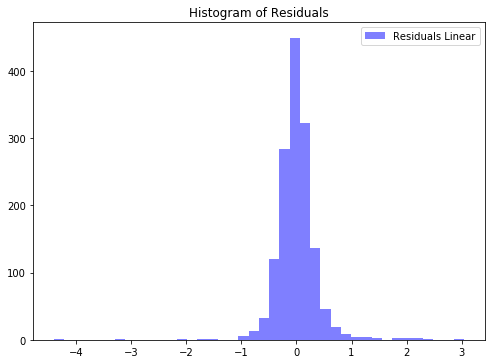

In [23]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

In [24]:
# 线性模型，随机梯度下降优化模型参数
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor()

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_

array([-0.00348152, -0.00348152, -0.05019501,  0.00427179,  0.00488759,
        0.06013009, -0.02933936, -0.00639209,  0.01610948,  0.01537177,
       -0.03379641,  0.03138141,  0.01934597, -0.01867122, -0.03844215,
       -0.06404231, -0.02161976,  0.00548912,  0.2626006 ,  0.08080795,
        0.10722878,  0.03702323,  0.04815542, -0.04609291, -0.01033966,
        0.02023601,  0.03206748,  0.06766382,  0.01625026,  0.00540165,
       -0.02302281,  0.06866872, -0.01820744,  0.04185186, -0.02528562,
        0.05478273, -0.01166318,  0.01911937,  0.00084944,  0.0648407 ,
        0.00267603, -0.02504468,  0.01131217,  0.01589597,  0.11703703,
        0.10994773,  0.00571197,  0.17796692,  0.06757513,  0.00401561,
        0.06963833,  0.0070306 , -0.066613  , -0.05520812,  0.0750318 ,
        0.07177557, -0.04743859,  0.00237998,  0.05595118, -0.01084628,
       -0.01170206,  0.026257  ,  0.1070838 ,  0.0337744 ,  0.04826259,
       -0.00537824, -0.01835803,  0.05374309,  0.01199969,  0.01

In [27]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of LinearRegression on test is', lr.score(X_test, y_test))
print('The value of default measurement of LinearRegression on train is', lr.score(X_train, y_train))

# 使用SGDRegressor模型自带的评估模块，并输出评估结果
print('The value of default measurement of SGDRegressor is', sgdr.score(X_test, y_test))

The value of default measurement of LinearRegression on test is 0.862043416389
The value of default measurement of LinearRegression on train is 0.862043416389
The value of default measurement of SGDRegressor is 0.842289874149


In [28]:
#岭回归／L2正则
from sklearn.linear_model import  RidgeCV

alphas = [0.01, 0.1, 1, 10,20, 40, 80,100]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)       

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

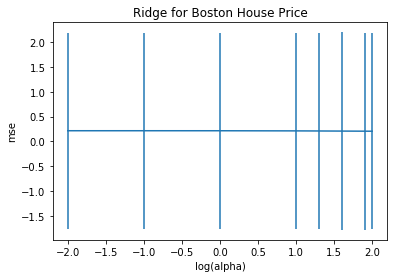

In [29]:
# plot
mse_mean = np.mean(reg.cv_values_, axis = 0)
mse_stds = np.std(reg.cv_values_, axis = 0)

x_axis = np.log10(alphas)
        
plt.errorbar(x_axis, mse_mean, yerr=mse_stds)

plt.title("Ridge for House Price")
plt.xlabel( 'log(alpha)' )
plt.ylabel( 'mse' )
plt.savefig( 'RidgeCV.png' )

plt.show()

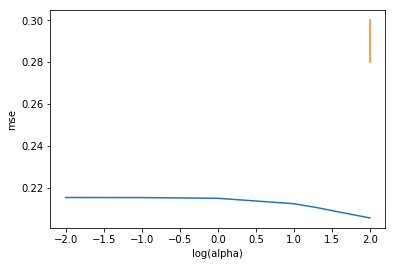

alpha is: 100.0


array([ -1.53084615e-03,  -1.53084615e-03,  -3.55195920e-02,
        -1.34791071e-05,  -7.76787151e-04,   4.38357340e-02,
        -2.59346162e-02,  -9.97334082e-03,   1.25120409e-02,
         1.89214948e-02,  -1.58253551e-02,   1.44796647e-02,
         1.88732905e-02,  -2.38343188e-02,  -3.61236256e-02,
        -4.20386975e-02,  -2.73384615e-02,   2.66166155e-04,
         2.27351416e-01,   7.15768811e-02,   1.10463446e-01,
         4.65700022e-02,   4.34743008e-02,  -6.29259153e-02,
        -1.90033816e-02,   1.99779670e-02,   2.78497640e-02,
         6.49730380e-02,   1.35131978e-02,   4.88658559e-04,
        -2.48138449e-02,   6.44387382e-02,  -1.29304894e-02,
         3.64183336e-02,  -2.53210172e-02,   5.40852425e-02,
        -1.07891440e-02,   2.03012040e-02,   5.84650136e-03,
         6.95832154e-02,   2.72090497e-03,  -3.35962130e-02,
         7.40191594e-03,   1.24060283e-02,   9.85283319e-02,
         1.04331557e-01,  -5.68523130e-03,   1.58630285e-01,
         4.66400454e-02,

In [30]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean) 
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

In [31]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of RidgeRegression is', reg.score(X_test, y_test))

The value of default measurement of RidgeRegression is 0.856243449285


In [32]:
#### Lasso／L1正则
#岭回归／L2正则
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10,20, 30, 40,100]

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train)     

LassoCV(alphas=[0.01, 0.1, 1, 10, 20, 30, 40, 100], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

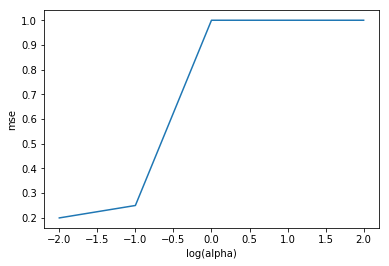

alpha is: 0.01


array([ -0.00000000e+00,  -0.00000000e+00,  -3.25429001e-02,
        -0.00000000e+00,   0.00000000e+00,   4.28037798e-02,
        -1.01876784e-02,  -1.94781773e-03,   9.29072538e-03,
         1.13196170e-02,  -3.43020593e-03,   4.46676536e-03,
         1.39557757e-02,  -1.26051380e-02,  -2.89578751e-02,
        -3.23512943e-02,  -3.38053139e-02,  -0.00000000e+00,
         2.71261943e-01,   6.31991846e-02,   1.28311241e-01,
         4.19425120e-02,   3.03771378e-02,  -4.65372779e-02,
        -0.00000000e+00,   0.00000000e+00,   2.07264448e-02,
         5.66147059e-02,   1.41949367e-03,   0.00000000e+00,
        -1.39145896e-02,   6.16201035e-02,  -2.86593224e-03,
         2.81810606e-02,  -1.45287262e-02,   4.98588666e-02,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         8.26368991e-02,   0.00000000e+00,  -2.56149592e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -1.03027315e-02,   3.33100398e-01,
         4.44591602e-02,

In [33]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [34]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print('The value of default measurement of Lasso Regression on test is', lasso.score(X_test, y_test))
print('The value of default measurement of Lasso Regression on train is', lasso.score(X_train, y_train))

The value of default measurement of Lasso Regression on test is 0.85311243781
The value of default measurement of Lasso Regression on train is 0.85311243781
